## Daten

https://www.kaggle.com/moltean/fruits

## Docker image pullen

```bash
docker pull tensorflow/tensorflow 
```

## Jupyterlab starten

Run a Jupyter notebook server with your own notebook directory (assumed here to be ~/notebooks). To use it, navigate to localhost:8888 in your browser.

- modify-pretrained.ipynb should be in $(pwd)/notebooks

```bash
docker run -it --rm -v$(pwd)/notebooks:/tf/notebooks -p 8888:8888 tensorflow/tensorflow:latest-jupyter
```

In [1]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease 
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [222 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [15.8 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1365 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1781 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2209 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [252 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [54.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [213

In [2]:
!apt install -y libgl1-mesa-glx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libbsd0 libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libedit2 libelf1 libgl1 libgl1-mesa-dri libglapi-mesa
  libglvnd0 libglx-mesa0 libglx0 libllvm10 libpciaccess0 libsensors4 libx11-6
  libx11-data libx11-xcb1 libxau6 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0
  libxcb-present0 libxcb-sync1 libxcb1 libxdamage1 libxdmcp6 libxext6
  libxfixes3 libxshmfence1 libxxf86vm1 multiarch-support
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libbsd0 libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libedit2 libelf1 libgl1 libgl1-mesa-dri
  libgl1-mesa-glx libglapi-mesa libglvnd0 libglx-mesa0 libglx0 libllvm10
  libpciaccess0 libsensors4 libx11-6 libx11-data libx11-xcb1 libxau6
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 li

7Progress: [ 14%] [########..................................................] 8Selecting previously unselected package libxxf86vm1:amd64.
Preparing to unpack .../01-libxxf86vm1_1%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86vm1:amd64 (1:1.1.4-1) ...
7Progress: [ 15%] [########..................................................] 87Progress: [ 16%] [#########.................................................] 8Selecting previously unselected package libelf1:amd64.
Preparing to unpack .../02-libelf1_0.170-0.4ubuntu0.1_amd64.deb ...
Unpacking libelf1:amd64 (0.170-0.4ubuntu0.1) ...
7Progress: [ 17%] [#########.................................................] 8Selecting previously unselected package libdrm-common.
Preparing to unpack .../03-libdrm-common_2.4.101-2~18.04.1_all.deb ...
7Progress: [ 18%] [##########................................................] 8Unpacking libdrm-common (2.4.101-2~18.04.1) ...
7Progress: [ 19%] [###########.............................................

7Progress: [ 54%] [###############################...........................] 8Selecting previously unselected package libglx-mesa0:amd64.
Preparing to unpack .../25-libglx-mesa0_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libglx-mesa0:amd64 (20.0.8-0ubuntu1~18.04.1) ...
7Progress: [ 55%] [################################..........................] 8Selecting previously unselected package libglx0:amd64.
Preparing to unpack .../26-libglx0_1.0.0-2ubuntu2.3_amd64.deb ...
7Progress: [ 56%] [################################..........................] 8Unpacking libglx0:amd64 (1.0.0-2ubuntu2.3) ...
7Progress: [ 57%] [#################################.........................] 8Selecting previously unselected package libgl1:amd64.
Preparing to unpack .../27-libgl1_1.0.0-2ubuntu2.3_amd64.deb ...
7Progress: [ 58%] [#################################.........................] 8Unpacking libgl1:amd64 (1.0.0-2ubuntu2.3) ...
7Progress: [ 59%] [##################################......

In [3]:
!/usr/bin/python3 -m pip install --upgrade pip
!pip install opencv-python
!pip install pandas
!pip install scipy

     |████████████████████████████████| 1.5 MB 6.7 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3
     |████████████████████████████████| 49.5 MB 39.5 MB/s eta 0:00:01   |████▎                           | 6.6 MB 5.8 MB/s eta 0:00:08
     |████████████████████████████████| 9.5 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 6.0 MB/s eta 0:00:01


In [4]:
import scipy
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [6]:
# image processing
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.preprocessing.image import img_to_array


# pretrained nets
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

## Download Data

https://www.kaggle.com/moltean/fruits

In [7]:
train_image_files_path = "fruits/Training/"
valid_image_files_path = "fruits/Test/"

In [8]:
!ls fruits/

LICENSE  Test  Training  papers  readme.md


image size: 100x100 pixels.

Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.

The paper introduces the dataset and an implementation of a Neural Network trained to recognized the fruits in the dataset.

In [9]:
example_images = !find $train_image_files_path -type f -name "*.jpg"

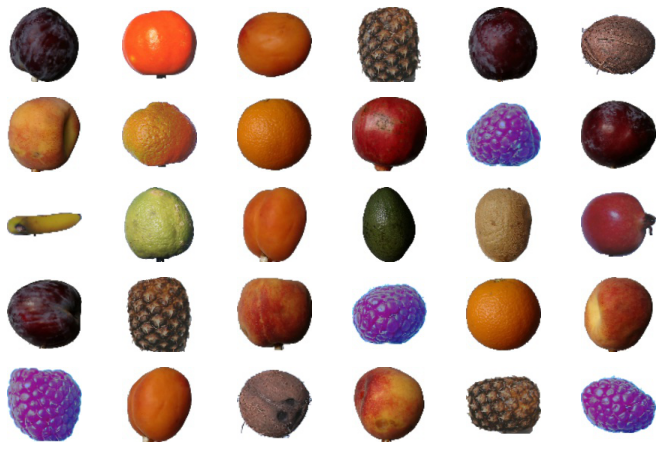

In [10]:
num_example_images = 30
example_images_random = random.sample(example_images, num_example_images)

fig = plt.figure(figsize=(12,8))

for i in range(num_example_images):
    fig.add_subplot(5, 6, i + 1)
    plt.axis('off')
    img = plt.imread(example_images_random[i])
    plt.imshow(img)

In [11]:
fruit_list = ["Apricot", "Avocado", "Banana", "Clementine", "Cocos", "Kiwi", "Lemon", 
              "Limes", "Mandarine", "Orange", "Peach", "Pineapple", "Plum", 
              "Pomegranate", "Raspberry", "Strawberry"]
output_n = len(fruit_list)
img_width = 32
img_height = 32
channels = 3
batch_size = 32

We passed three arguments to the constructor:

- weights, to specify which weight checkpoint to initialize the model from
- include_top, which refers to including or not the densely-connected classifier on top of the network. By default, this densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected classifier, we don't need to include it.

In [12]:
# important: exclude top layers
base_model = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (img_width, img_height, channels))

58892288/58889256 [==============================] - 3s 0us/step


In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [14]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255#,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True
)

valid_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

train_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

valid_image_array_gen = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

Found 7709 images belonging to 16 classes.
Found 2592 images belonging to 16 classes.


In [15]:
input_shape = train_image_array_gen.image_shape
classes = train_image_array_gen.class_indices
num_classes = len(classes)
class_counts = np.unique(train_image_array_gen.classes, return_counts=True)[1]
print("Shape:" + str(input_shape))
print("Number of classes:" + str(num_classes))
print("Classes:" + str(classes))

Shape:(32, 32, 3)
Number of classes:16
Classes:{'Apricot': 0, 'Avocado': 1, 'Banana': 2, 'Clementine': 3, 'Cocos': 4, 'Kiwi': 5, 'Lemon': 6, 'Limes': 7, 'Mandarine': 8, 'Orange': 9, 'Peach': 10, 'Pineapple': 11, 'Plum': 12, 'Pomegranate': 13, 'Raspberry': 14, 'Strawberry': 15}


In [16]:
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

7709 2592


In [17]:
# Create the model
model = models.Sequential()
 
# Add the base model
model.add(base_model)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(output_n, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               128250    
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4016      
Total params: 14,846,954
Trainable params: 14,846,954
Non-trainable params: 0
_________________________________________________________________


In [18]:
base_model.trainable = False

In [19]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = optimizers.RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])

In [20]:
steps_per_epoch = int(train_samples / batch_size) # increase when using data augmentation
print(steps_per_epoch)
validation_steps = int(valid_samples / batch_size)
print(validation_steps)

240
81


In [21]:
history = model.fit(
      train_image_array_gen,
      steps_per_epoch = steps_per_epoch,
      epochs = 100,
      validation_data = valid_image_array_gen,
      validation_steps = validation_steps,
      callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose = 1)],
      verbose = 1)

Epoch 1/100
240/240 [==============================] - 49s 205ms/step - loss: 2.2959 - accuracy: 0.2997 - val_loss: 1.6795 - val_accuracy: 0.7130
Epoch 2/100
240/240 [==============================] - 37s 153ms/step - loss: 1.4248 - accuracy: 0.6525 - val_loss: 1.1091 - val_accuracy: 0.7843
Epoch 3/100
240/240 [==============================] - 31s 128ms/step - loss: 0.9726 - accuracy: 0.7831 - val_loss: 0.8059 - val_accuracy: 0.8391
Epoch 4/100
240/240 [==============================] - 32s 133ms/step - loss: 0.7055 - accuracy: 0.8453 - val_loss: 0.6224 - val_accuracy: 0.8681
Epoch 5/100
240/240 [==============================] - 31s 131ms/step - loss: 0.5478 - accuracy: 0.8835 - val_loss: 0.5100 - val_accuracy: 0.8816
Epoch 6/100
240/240 [==============================] - 32s 135ms/step - loss: 0.4284 - accuracy: 0.9075 - val_loss: 0.4322 - val_accuracy: 0.8912
Epoch 7/100
240/240 [==============================] - 31s 130ms/step - loss: 0.3515 - accuracy: 0.9259 - val_loss: 0.3769 -

240/240 [==============================] - 30s 125ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.0225 - val_accuracy: 0.9911
Epoch 57/100
240/240 [==============================] - 30s 126ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0274 - val_accuracy: 0.9911
Epoch 58/100
240/240 [==============================] - 30s 125ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0249 - val_accuracy: 0.9915
Epoch 59/100
240/240 [==============================] - 30s 125ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0246 - val_accuracy: 0.9911
Epoch 60/100
240/240 [==============================] - 30s 123ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0235 - val_accuracy: 0.9919
Epoch 00060: early stopping


In [22]:
# Save the weights
model.save_weights('model_pre.h5')

# Save the model architecture
with open('model_pre_architecture.json', 'w') as f:
    f.write(model.to_json())

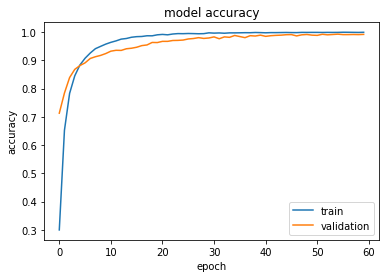

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

In [24]:
base_model.trainable = True

set_trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [25]:
top_weights_path = 'top_model_weights.h5'
callbacks_list = [
        ModelCheckpoint(top_weights_path, monitor = 'val_accuracy', 
                        verbose = 1, save_best_only = True),
        EarlyStopping(monitor = 'val_accuracy', patience = 5, verbose = 1)
    ]

In [26]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = optimizers.RMSprop(lr = 0.000001, decay = 1e-6),
              metrics = ['accuracy'])

In [27]:
history = model.fit(
      train_image_array_gen,
      steps_per_epoch = steps_per_epoch,
      epochs = 100,
      validation_data = valid_image_array_gen,
      validation_steps = validation_steps,
      callbacks = callbacks_list,
      verbose = 1)

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9988
Epoch 00001: val_accuracy improved from -inf to 0.99035, saving model to top_model_weights.h5
240/240 [==============================] - 92s 385ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0241 - val_accuracy: 0.9904
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9995
Epoch 00002: val_accuracy improved from 0.99035 to 0.99306, saving model to top_model_weights.h5
240/240 [==============================] - 91s 380ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 3/100
240/240 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9996
Epoch 00003: val_accuracy improved from 0.99306 to 0.99383, saving model to top_model_weights.h5
240/240 [==============================] - 90s 374ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0173 - val_accuracy: 0.9938
Epoch 4/100
240/240

In [28]:
# Save the model architecture
with open('fruits_classifier_fine_tuned_vgg16.json', 'w') as f:
    f.write(model.to_json())

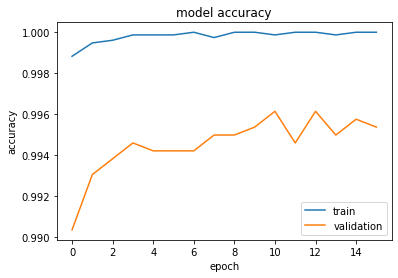

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

In [41]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=11569 sha256=0dfead7adec73873be0cefb7ac2d3a0221582574a046c739b835a7f280e78cc8
  Stored in directory: /root/.cache/pip/wheels/90/1d/93/c863ee832230df5cfc25ca497b3e88e0ee3ea9e44adc46ac62
Successfully built wget


In [43]:
test_image_files_path = "https://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg"

In [44]:
import wget

filename = wget.download(test_image_files_path)
filename

'Banana-Single.jpg'

In [45]:
!ls

Banana-Single.jpg			 model_pre_architecture.json
fruits					 modify-pretrained.ipynb
fruits_classifier_fine_tuned_vgg16.json  modify-pretrained.pdf
model_pre.h5				 top_model_weights.h5


In [31]:
classes = train_image_array_gen.class_indices
classes

{'Apricot': 0,
 'Avocado': 1,
 'Banana': 2,
 'Clementine': 3,
 'Cocos': 4,
 'Kiwi': 5,
 'Lemon': 6,
 'Limes': 7,
 'Mandarine': 8,
 'Orange': 9,
 'Peach': 10,
 'Pineapple': 11,
 'Plum': 12,
 'Pomegranate': 13,
 'Raspberry': 14,
 'Strawberry': 15}

In [32]:
def classify_image_model(image, classes=classes):
    img = cv2.imread(image)        
    b,g,r = cv2.split(img)       # get b,g,r
    img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    image = image_utils.load_img(image, target_size=(img_width, img_height))
    image = image_utils.img_to_array(image)

    image = np.expand_dims(image, axis=0)

    # scale pixels between -1 and 1, sample-wise
    image /= 255.
        
    prediction = model.predict(image)
    
    pred = prediction.argmax()

    for k, v in classes.items():
        if (v == pred):
            pred_label = k
        
    proba = prediction.max()
    
    print("Predicted class: " + pred_label + 
          " with probability " + str(proba*100) + "%")

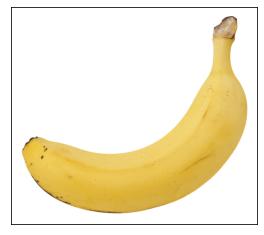

Predicted class: Banana with probability 100.0%


In [46]:
classify_image_model("Banana-Single.jpg")